# Môn: Phân tích dữ liệu
# Lớp: IE224.O11
# Nhóm: 4
# Đề tài: 
### &nbsp;&nbsp;&nbsp;&nbsp;Kiểm định giá của bất động sản tại khu vực TP.HCM
# Thành viên nhóm:
### &nbsp;&nbsp;&nbsp;&nbsp;1. Nguyễn Viết Công - 21520657
### &nbsp;&nbsp;&nbsp;&nbsp;2. Phạm Thanh Đạt - 21520710
### &nbsp;&nbsp;&nbsp;&nbsp;3. Lê Văn Cao Kỳ - 21521046
### &nbsp;&nbsp;&nbsp;&nbsp;4. Đinh Công Thiện - 21522617

##### Nhập modules

In [1]:
from preprocessing import *
from eda import *
from modeling import *

Cài đặt pandas

In [2]:
pd.options.display.max_columns = None

Load bộ dữ liệu thô

In [3]:
df = pd.read_csv(
    "./batdongsan_com_vn.csv",
    names=["_id", "title", "url", "verified", "publishDate", "dueDate", "newsRank", "businessForm", "city", "district", "street", "category", "description", "projectTitle", "projectUnitPrice", "projectArea", "projectBuildings", "projectInvestor", "latitude", "longitude", "area", "price", "frontLength", "entranceLength", "facingDir", "balconyDir", "floor", "bedroom", "wc", "legalStatus", "furniture"]
)

Demo bộ dữ liệu

In [4]:
df.head()

,_id,title,url,verified,publishDate,dueDate,newsRank,businessForm,city,district,street,category,description,projectTitle,projectUnitPrice,projectArea,projectBuildings,projectInvestor,latitude,longitude,area,price,frontLength,entranceLength,facingDir,balconyDir,floor,bedroom,wc,legalStatus,furniture
0,38349090,Bán cắt lỗ căn 2N1Wc 60m2 tại Vinhomes Ocean P...,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,1.0,18/10/2023,25/10/2023,Tin VIP Kim Cương,Bán,Hà Nội,Gia Lâm,Vinhomes Ocean Park Gia Lâm,Căn hộ chung cư,Tôi chính chủ cần bán căn hộ loại 2 phòng ngủ ...,Vinhomes Ocean Park Gia Lâm,"49,06 - 49,06 triệu/m²",NaN,66.0,Tập đoàn Vingroup,21.002415,105.964111,54 m²,"1,75 tỷ",NaN,NaN,Đông - Nam,Tây - Bắc,NaN,2.0,1.0,Sổ đỏ/ Sổ hồng,Đầy đủ
1,38333507,"Chính chủ - Nhà hẻm 618 CMT8 Quận 3, sổ hồng 8...",https://batdongsan.com.vn/ban-nha-rieng-duong-...,1.0,17/10/2023,01/11/2023,Tin VIP Kim Cương,Bán,Hồ Chí Minh,Quận 3,đường Cách Mạng Tháng Tám,Nhà riêng,"Bán nhà trệt, hẻm 618 Cách Mạng Tháng Tám phườ...",NaN,NaN,NaN,NaN,NaN,10.786322,106.665912,83 m²,"9,5 tỷ","6,5 m",NaN,Tây - Bắc,NaN,NaN,2.0,2.0,Sổ đỏ/ Sổ hồng,NaN
2,38330652,"Chính chủ bán nhà sổ hồng, đẹp - nhà kiến trúc...",https://batdongsan.com.vn/ban-nha-rieng-duong-...,1.0,16/10/2023,26/10/2023,Tin VIP Kim Cương,Bán,Hồ Chí Minh,Bình Thạnh,đường Phan Văn Trị,Nhà riêng,Chính chủ bán nhà đẹp - nhà kiến trúc sư thiết...,NaN,NaN,NaN,NaN,NaN,10.820181,106.694719,"42,2 m²","6,95 tỷ","3,4 m","2,5 m",Tây - Nam,Tây - Nam,5.0,2.0,3.0,Sổ đỏ/ Sổ hồng,Cơ bản
3,38310577,Chính chủ bán đất 2 mặt tiền 81m2 mặt đường Đa...,https://batdongsan.com.vn/ban-dat-duong-da-sy-...,1.0,13/10/2023,23/10/2023,Tin VIP Kim Cương,Bán,Hà Nội,Hà Đông,đường Đa Sỹ,Bán đất,"- Địa chỉ: Mặt đường Đa Sỹ, P. Kiến Hưng, Q. H...",NaN,NaN,NaN,NaN,NaN,20.959258,105.785736,81 m²,"9,9 tỷ",4 m,NaN,Đông,NaN,NaN,NaN,NaN,Sổ đỏ/ Sổ hồng.,NaN
4,38135951,"Đất thổ cư TX52, khu dân cư hiện hữu P. Thạnh ...",https://batdongsan.com.vn/ban-dat-duong-thanh-...,1.0,19/10/2023,03/11/2023,Tin VIP Vàng,Bán,Hồ Chí Minh,Quận 12,đường Thạnh Xuân 52,Bán đất,"Đất thổ cư TX52, khu dân cư hiện hữu P. Thạnh ...",NaN,NaN,NaN,NaN,NaN,10.893666,106.682694,115 m²,34 triệu/m²,4 m,8 m,Bắc,NaN,NaN,NaN,NaN,Sổ đỏ/ Sổ hồng,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   _id               10051 non-null  int64  
 1   title             10051 non-null  object 
 2   url               10051 non-null  object 
 3   verified          6848 non-null   float64
 4   publishDate       10051 non-null  object 
 5   dueDate           10051 non-null  object 
 6   newsRank          10051 non-null  object 
 7   businessForm      10051 non-null  object 
 8   city              10047 non-null  object 
 9   district          10051 non-null  object 
 10  street            10051 non-null  object 
 11  category          10051 non-null  object 
 12  description       10051 non-null  object 
 13  projectTitle      2852 non-null   object 
 14  projectUnitPrice  1544 non-null   object 
 15  projectArea       640 non-null    object 
 16  projectBuildings  1192 non-null   float6

#### Mô tả bộ dữ liệu: Tin đăng bất động sản (bđs)
- `_id`: ID của tin đăng.
- `title`: Tiêu đề của tin đăng.
- `url`: Đường dẫn đến tin đăng.
- `verified`: Tin đăng đã được xác thực chưa (1/0).
- `publishDate`: Ngày đăng tin.
- `dueDate`: Ngày hết hạn tin đăng.
- `newsRank`: Cấp của tin đăng.
- `businessForm`: Hình thức kinh doanh của bđs.
- `city`: Thành phố mà bđs trực thuộc.
- `district`: Quận/huyện mà bđs trực thuộc.
- `street`: Tên đường mà bđs trực thuộc.
- `category`: Loại bđs.
- `description`: Mô tả của tin đăng.
- `projectTitle`: Tên dự án mà bđs thuộc về.
- `projectUnitPrice`: Giá đơn vị (/tháng hoặc /$m^2$) của dự án mà bđs thuộc về.
- `projectArea`: Diện tích của dự án mà bđs thuộc về.
- `projectBuildings`: Số tòa nhà của dự án mà bđs thuộc về.
- `projectInvestor`: Nhà đầu tư của dự án mà bđs thuộc về.
- `latitude`: Vĩ độ của bđs.
- `longitude`: Kinh độ của bđs.
- `area`: Diện tích của bđs.
- `price`: Giá của bđs.
- `frontLength`: Độ dài mặt tiền của bđs.
- `entranceLength`: Độ dài lối vào bđs.
- `facingDir`: Hướng nhà của bđs.
- `balconyDir`: Hướng ban công của bđs.
- `floor`: Số lầu của bđs.
- `bedroom`: Số phòng ngủ của bđs.
- `wc`: Số nhà vệ sinh của bđs.
- `legalStatus`: Tình trạng pháp lý của bđs.
- `furniture`: Nội thất của bđs.

### Preprocessing

#### class `PreprocessPipeline`

**Mô tả:** Class lưu lại các bước tiền xử lý thành một đường dẫn (pipeline).

Khởi tạo một preprocess pipeline cho bộ dữ liệu

In [6]:
preprocess_pl = PreprocessPipeline()

#### Các bước tiền xử lý

Theo như đề tài, chỉ xét các bđs thuộc TP.HCM

In [7]:
preprocess_pl.add(
    "in_hcmc",
    lambda df: df[df["city"] == "Hồ Chí Minh"]
)

Loại bỏ các biến:
- `_id`: Không có giá trị.
- `title`: Không đủ khả năng phân tích.
- `url`: Không có giá trị.
- `city`: Đã sàng lọc.
- `description`: Không đủ khả năng phân tích.

In [8]:
preprocess_pl.add(
    "no_use_cols",
    lambda df: df.drop(columns=["_id", "title", "url", "city", "description"])
)

#### `verified`

Chuyển giá trị nan của biến `verified` thành 0

In [9]:
preprocess_pl.add(
    "map_verified",
    lambda df: pd.concat([
        df.pop("verified").replace(np.nan, 0),
        df
    ], axis=1)
)

#### `price`

Các giá trị xuất hiện trong biến `price`

In [10]:
df["price"].unique()[:12]

array(['1,75 tỷ', '9,5 tỷ', '6,95 tỷ', '9,9 tỷ', '34 triệu/m²', '4,1 tỷ',
       '2,35 tỷ', '21,5 tỷ', '5,6 tỷ', '40 tỷ', '16 tỷ', '3,45 tỷ'],
      dtype=object)

Chuyển giá trị biến `price` thành dạng số (theo tỷ) và loại bỏ các giá trị khuyết

In [11]:
preprocess_pl.add(
    "map_price",
    lambda df: map_unit(
        df, cols="price",
        unit_mapper={
            "tỷ": 1,
            "triệu": 1e-3,
            "nghìn": 1e-6
        }
    ).dropna(subset="price")
)

#### `projectTitle`

Biến `projectTitle` sẽ không được sử dụng, thay vào đó ta tạo một biến mới `isInProject` cho biết bđs có thuộc một dự án nào đó không

In [12]:
preprocess_pl.add(
    "replace_projectTitle_isInProject",
    lambda df: pd.concat([
        df.pop("projectTitle").notna(),
        df
    ], axis=1).rename(columns={"projectTitle": "isInProject"})
)

#### `projectUnitPrice`

Các giá trị xuất hiện trong biến `projectUnitPrice`

In [13]:
df["projectUnitPrice"].unique()

array(['49,06 - 49,06 triệu/m²', nan, '24,65 - 24,65 triệu/m²',
       '20,92 - 20,92 triệu/m²', '14 - 14 triệu/m²',
       '64,88 - 64,88 triệu/m²', '215 - 215 triệu/m²', '83 - 83 triệu/m²',
       '11 - 13 triệu/tháng', '71,23 - 83,47 triệu/tháng',
       '33,7 - 62,6 triệu/tháng', '6,2 - 10,37 triệu/tháng',
       '31,4 - 68 triệu/tháng', '12 - 15 triệu/tháng',
       '99,48 - 136,72 triệu/tháng', '19,3 - 28,35 triệu/tháng',
       '60 - 60 triệu/m²', '18 - 52,08 triệu/tháng',
       '2,64 - 2,64 triệu/m²'], dtype=object)

Chuyển giá trị biến `projectUnitPrice` thành dạng số (theo tỷ)

In [14]:
preprocess_pl.add(
    "map_projectUnitPrice",
    lambda df: map_unit(
        df, cols="projectUnitPrice",
        unit_mapper={
            "tỷ": 1,
            "triệu": 1e-3,
            "nghìn": 1e-6
        },
        quantity_mapper=interval_quant_mapper
    )
)

#### `projectArea`

Các giá trị xuất hiện trong biến `projectArea`

In [15]:
df["projectArea"].unique()[:30]

array([nan, '53-86 m²', '63-400 m²', '48-117 m²', '61 - 198 m²',
       '80-187 m²', '63-83 m²', '50-184 m²', '28 - 76  m²', '69-103 m²',
       '68-161 m²', '42-77 m²', '52 - 133 m²', '45-100 m²', '28 – 98 m²',
       '27-127 m²', '56-162 m²', '63-115 m²', '68-220 m²', '50-106 m²',
       '58-125 m²', '80-320 m²', '93-580 m²', '79-112 m²', '122-300 m²',
       '80-242 m²', '71-92 m²', '34-57 m²', '25-82 m²', '80-154 m²'],
      dtype=object)

Chuyển giá trị biến `projectArea` thành dạng số (theo $m^2$)

In [16]:
preprocess_pl.add(
    "map_projectArea",
    lambda df: map_unit(
        df, cols="projectArea",
        unit_mapper={
            "m²": 1,
            "km²": 1e6
        },
        quantity_mapper=interval_quant_mapper
    )
)

In [17]:
preprocess_pl.add(
    "fill_project_nan",
    lambda df: fill_na(
        df, by=["projectArea", "projectUnitPrice", "projectBuildings"],
        value=0,
        # indices=~df["isInProject"]
    )
)

#### `area`

Các giá trị xuất hiện trong biến `area`

Chuyển giá trị biến `area` thành dạng số (theo $m^2$)

In [18]:
preprocess_pl.add(
    "map_area",
    lambda df: map_unit(
        df, cols="area",
        unit_mapper={
            "m²": 1,
            "km²": 1e6
        }
    )
)

#### `frontLength, entranceLength`

Các giá trị xuất hiện trong biến `frontLength, entranceLength`

In [19]:
print(f"frontLength: {df['frontLength'].unique()[:20]}")
print(f"entranceLength: {df['entranceLength'].unique()[:20]}")

frontLength: [nan '6,5 m' '3,4 m' '4 m' '8 m' '4,5 m' '5 m' '25 m' '3,5 m' '5,5 m'
 '10 m' '100 m' '6 m' '7 m' '6,1 m' '9,11 m' '25,5 m' '3 m' '150 m' '20 m']
entranceLength: [nan '2,5 m' '8 m' '6 m' '7 m' '30 m' '2 m' '12 m' '5 m' '11 m' '19 m'
 '20 m' '10 m' '9 m' '39 m' '13 m' '22 m' '4 m' '50 m' '18,5 m']


Chuyển giá trị biến `frontLength, entranceLength` thành dạng số (theo $m$)

In [20]:
preprocess_pl.add(
    "map_frontLength_entranceLenth",
    lambda df: map_unit(
        df, cols=("frontLength", "entranceLength"),
        unit_mapper={
            "m": 1,
            "km": 1e3
        }
    )
)

#### `legalStatus`

Các giá trị xuất hiện trong biến `legalStatus`

In [21]:
df["legalStatus"].unique()

array(['Sổ đỏ/ Sổ hồng', 'Sổ đỏ/ Sổ hồng.', nan,
       'Sổ đỏ chính chủ sẵn sàng giao dịch.', 'Đã có sổ đỏ',
       'Đang chờ sổ. HĐMB', 'Sổ đỏ', 'Sổ hồng', 'Sổ đỏ.',
       'Sổ hồng chính chủ.',
       'Sổ Hồng cá nhân + full SKC 30 năm + ngành nghề SX Gỗ -',
       'Hợp đồng mua bán', 'Sổ đỏ chính chủ, không dính quy hoạch',
       'Đang chờ sổ', 'Sổ hồng, sổ đỏ.', 'Hợp đồng mua bán.',
       'Sổ Hồng riêng', 'Đã có sổ.', 'Hợp đồng đặt cọc', 'Đã có sổ Hồng',
       'Đã có sổ', 'Đã có sổ hồng.', 'Full thổ cư, đã có sổ.',
       'Đứng tên sổ hồng chính chủ', 'Đã có sổ đỏ.', 'Sổ đỏ đã có',
       'Đã có sổ hồng riêng', 'Đã có sổ hồng', 'Sổ đỏ/ sổ hồng',
       'Sổ đỏ lâu dài.', 'Đầy đủ', 'Sổ Hồng',
       'Sổ đỏ mới tinh sẵn công chứng', 'Có sổ', 'Sổ hồng riêng',
       'Sổ riêng', 'Sổ hồng sang tên ngay', 'Sổ hồng riêng hoàn công',
       'Sổ đỏ/ sổ hồng.', 'HĐMB.', 'HĐMB', 'SHR', 'Có sổ.',
       'Sổ đỏ cá nhân', 'Sổ chính chủ.', 'Sổ hồng riêng chính chủ',
       'Sổ hồng riêng hoàn 

Số lượng mẫu có giá trị `legalStatus`

Nhìn chung, `legalStatus` có thể được chia như sau:
| Cấp độ | Tên          | Keywords                  |
|--------|--------------|---------------------------|
|    1   | Đang chờ sổ  | "chờ"                     |
|    2   | Sổ hoàn công | "hoàn công"               |
|    3   | Sổ đỏ/hồng   | "đỏ", "hồng", "có", "sẵn" |

In [22]:
preprocess_pl.add(
    "map_legalStatus",
    lambda df: map_keyword(
        df, cols="legalStatus",
        category_keywords_mapper={
            "Sổ đỏ/hồng": ("đỏ", "hồng", "có", "sẵn"),
            "Sổ hoàn công": ("hoàn công",),
            "Đang chờ sổ": ("chờ",)
        }
    )
)

Vì "Sổ hoàn công" và "Đang chờ sổ" chỉ chiếm thiểu số và không đủ giá trị phân tích. Ta chỉ quan tâm xem bđs đã có "Sổ đỏ/hồng" hay chưa.

In [23]:
preprocess_pl.add(
    "legalStatus_as_other",
    lambda df: pd.concat([
        df.pop("legalStatus").replace(["Đang chờ sổ", "Sổ hoàn công", np.nan], "other"),
        df,
    ], axis=1)
)

#### `furniture`

Các giá trị xuất hiện trong biến `furniture`

In [24]:
df["furniture"].unique()

array(['Đầy đủ', nan, 'Cơ bản', 'Cơ bản.', 'Đầy đủ.', 'Thô',
       'Nội thất bàn giao nhập khẩu Hafele, Duravit, Bravat, điều hoà âm trần Multi.',
       'Thông sàn.', 'Nội thất hiện đại cao cấp.',
       'Nội thất nguyên bản chủ đầu tư.', 'Không nội thất.', 'Tặng đồ.',
       'Full nội thất 5 sao.', 'Nội thất đầy đủ, cao cấp.',
       'Nội thất đầy đủ',
       'Nội thất CĐT: 3 điều hòa, nóng lạnh và thiết bị vệ sinh.',
       'Đây đủ nội thất', 'Không nội thất', 'Cao cấp.',
       'Nội thất: Bàn giao nguyên bản chủ đầu tư.', 'Cao cấp',
       'Full nội thất.', 'Full đồ.', 'Hoàn thiện thô bên trong.', 'Full.',
       'Hoàn thiện mặt ngoài thô bên trong hình thật 100%',
       'Hoàn thiện ngoài và thô bên trong.', 'Nội thất nguyên bản.',
       'Tặng hết nội thất', 'Nội thất cao cấp',
       'Cơ bản nội thất sang trọng (1 tivi, 2 máy lạnh, 1 tủ lạnh, 1 máy giặt).',
       'Hoàn thiện mặt ngoài thô bên trong.', 'Full nội thất cao cấp',
       'Nội thất cao cấp.', 'Nội thất như hìn

Nhìn chung, `furniture` có thể được chia như sau:
| Cấp độ | Tên     | Keywords               |
|--------|---------|------------------------|
|    1   | Không   | "không", "thô"         |
|    2   | Cơ bản  | "cơ bản", "có"         |
|    3   | Đầy đủ  | "đầy đủ", "đủ", "full" |
|    4   | Cao cấp | "cao cấp"              |

Số lượng mẫu có giá trị `furniture`

In [25]:
preprocess_pl.add(
    "map_furniture", 
    lambda df: map_keyword(
        df, cols="furniture",
        category_keywords_mapper={
            "Cao cấp": ("cao cấp",),
            "Đầy đủ": ("đầy đủ", "đủ", "full"),
            "Cơ bản": ("cơ bản", "căn bản", "có"),
            "Không": ("không", "ko", "thô")
        }
    )
)

Tỉ lệ số lượng mẫu `furniture` giữ được giá trị sau khi ánh xạ

#### Chuyển kiểu của biến

Thay đổi thành giá trị datetime của các biến:
- `publishDate`
- `dueDate`

Và sắp xếp các mẫu theo thời gian đăng tin.

In [26]:
preprocess_pl.add(
    "publishDate_dueDate_as_datetime",
    lambda df: to_datetime(
        df,
        cols_formats={
            "publishDate": "%d/%m/%Y",
            "dueDate": "%d/%m/%Y"
        }
    ).sort_values(by="publishDate")
)

#### `category`

Số lượng các loại bđs

In [27]:
df["category"].value_counts()

category
Bán đất                          2814
Căn hộ chung cư                  2099
Nhà riêng                        1946
Nhà mặt phố                       796
Nhà biệt thự, liền kề             673
Nhà trọ, phòng trọ                418
Đất nền dự án                     384
Văn phòng                         333
Kho, nhà xưởng, đất               273
Shophouse, nhà phố thương mại     133
Cửa hàng, ki ốt                    86
Kho, nhà xưởng                     51
Trang trại, khu nghỉ dưỡng         25
Loại bất động sản khác             13
Condotel                            7
Name: count, dtype: int64

Để thuận lợi cho quá trình phân tích và huấn luyện mô hình. Các loại bđs có quá ít mẫu $(< 30)$ sẽ bị loại bỏ

In [28]:
preprocess_pl.add(
    "rm_low_freq_category",
    lambda df: handle_low_freq(
        df, by="category",
        min_freq=30,
        separating_category="businessForm",
        action="remove"
    )
)

#### `projectInvestor`

Số lượng bđs thuộc các nhà đầu tư

In [29]:
df["projectInvestor"].value_counts()

projectInvestor
Tập đoàn Vingroup                                       403
Đang cập nhật                                           386
Công ty TNHH Phát Triển Phú Mỹ Hưng                      76
Novaland Group                                           72
Công ty CP Đầu tư Địa ốc Vạn Phúc - Dai Phuc Group       70
                                                       ... 
Công ty CP Đầu tư Xây dựng và Kinh doanh nhà Sài Gòn      1
Công ty TNHH Hanotex                                      1
Công ty CP Xây dựng số 3 - VINACONEX3                     1
Công ty CP Đầu tư Xây lắp Dầu khí Việt Nam                1
Công ty CP Bất động sản Sài Gòn Mới                       1
Name: count, Length: 349, dtype: int64

Để thuận lợi cho việc phân tích, các nha đầu tư dự án ít ($< 10$, bao gôm "Đang cập nhật") sẽ được gom thành 1 nhóm "other", đại diện cho nhóm nhà đầu tư nhỏ.

In [30]:
preprocess_pl.add(
    "low_freq_projectInvestor_as_other",
    lambda df: handle_low_freq(
        df, by="projectInvestor",
        min_freq=10,
        action="as_other"
    )
)
preprocess_pl.add(
    "dangcapnhat_projectInvestor_as_other",
    lambda df: as_other(df, by="projectInvestor", categories="Đang cập nhật")
)

#### `district`, `street`

Số lượng các quận, con đường khác nhau tại TP.HCM

In [31]:
df[["district", "street"]].nunique()

district     310
street      3347
dtype: int64

Do số lượng các con đường quá lớn. Ta có thể gián tiếp gom nhóm các con đường thông qua các quận. Do đó, ta có thể bỏ đi biến `street`

In [32]:
preprocess_pl.add(
    "drop_street",
    lambda df: df.drop(columns="street")
)

#### Điền giá trị khuyết

Khi điền giá trị bị khuyết bằng Random Forest, ta loại bỏ các yếu tố liên quan đến dự án và giá cả để tránh thiên vị trong dữ liệu.

In [33]:
preprocess_pl.add(
    "miceforest_impute",
    lambda df: mf_impute(
        df,
        exclude=["projectArea", "projectUnitPrice", "projectBuildings", "price"]
    )
)

Các bước tiền xử lý dữ liệu

In [34]:
preprocess_pl

{'in_hcmc': <function __main__.<lambda>(df)>,
 'no_use_cols': <function __main__.<lambda>(df)>,
 'map_verified': <function __main__.<lambda>(df)>,
 'map_price': <function __main__.<lambda>(df)>,
 'replace_projectTitle_isInProject': <function __main__.<lambda>(df)>,
 'map_projectUnitPrice': <function __main__.<lambda>(df)>,
 'map_projectArea': <function __main__.<lambda>(df)>,
 'fill_project_nan': <function __main__.<lambda>(df)>,
 'map_area': <function __main__.<lambda>(df)>,
 'map_frontLength_entranceLenth': <function __main__.<lambda>(df)>,
 'map_legalStatus': <function __main__.<lambda>(df)>,
 'legalStatus_as_other': <function __main__.<lambda>(df)>,
 'map_furniture': <function __main__.<lambda>(df)>,
 'publishDate_dueDate_as_datetime': <function __main__.<lambda>(df)>,
 'rm_low_freq_category': <function __main__.<lambda>(df)>,
 'low_freq_projectInvestor_as_other': <function __main__.<lambda>(df)>,
 'dangcapnhat_projectInvestor_as_other': <function __main__.<lambda>(df)>,
 'drop_str

Tiến hành áp dụng các bước tiền xử lý phục vụ cho EDA

In [35]:
verified = df["verified"] == 1

verified_df = preprocess_pl(df[verified])

#### Bộ dữ liệu sau khi tiền xử lý

In [36]:
verified_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2812 entries, 108 to 9986
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   balconyDir        352 non-null    object        
 1   businessForm      2812 non-null   object        
 2   category          2812 non-null   object        
 3   district          2812 non-null   object        
 4   dueDate           2812 non-null   datetime64[ns]
 5   facingDir         759 non-null    object        
 6   furniture         1530 non-null   object        
 7   isInProject       2812 non-null   bool          
 8   legalStatus       2812 non-null   object        
 9   newsRank          2812 non-null   object        
 10  price             2812 non-null   float64       
 11  projectArea       2812 non-null   float64       
 12  projectBuildings  2812 non-null   float64       
 13  projectInvestor   378 non-null    object        
 14  projectUnitPrice  2812 non-

In [37]:
verified_df.head()

,balconyDir,businessForm,category,district,dueDate,facingDir,furniture,isInProject,legalStatus,newsRank,price,projectArea,projectBuildings,projectInvestor,projectUnitPrice,publishDate,verified,latitude,longitude,area,frontLength,entranceLength,floor,bedroom,wc
108,Bắc,Bán,Nhà riêng,Tân Bình,2023-10-22,Bắc,Đầy đủ,False,Sổ đỏ/hồng,Tin thường,14.90,0.0,0.0,NaN,0.00000,2023-09-22,1.0,10.781588,106.653514,94.0,2.5,5.0,5.0,5.0,6.0
150,Nam,Bán,"Nhà biệt thự, liền kề",Quận 7,2023-10-22,Nam,NaN,True,Sổ đỏ/hồng,Tin thường,42.00,0.0,0.0,Công ty TNHH Đầu tư Địa ốc Thành phố (CityLand),0.02092,2023-09-22,1.0,10.737704,106.726030,220.0,6.0,12.0,4.0,6.0,5.0
167,NaN,Bán,Nhà riêng,Quận 7,2023-10-23,NaN,Đầy đủ,False,Sổ đỏ/hồng,Tin thường,5.00,0.0,0.0,NaN,0.00000,2023-09-23,1.0,10.747051,106.728944,56.7,8.0,4.0,3.0,3.0,2.0
158,NaN,Bán,Bán đất,Thủ Đức,2023-10-25,NaN,NaN,False,Sổ đỏ/hồng,Tin thường,6.50,0.0,0.0,NaN,0.00000,2023-09-25,1.0,10.882578,106.772604,90.0,4.0,6.0,1.0,2.0,1.0
1494,NaN,Bán,Bán đất,Thủ Đức,2023-10-25,NaN,NaN,False,Sổ đỏ/hồng,Tin thường,3.62,0.0,0.0,NaN,0.00000,2023-09-25,1.0,10.880693,106.734293,62.2,4.0,4.0,2.0,4.0,3.0


Tất cả các biến đã sẵn sàng để được phân tích.

### EDA

Biểu đồ histogram của giá trị các biến dạng số

{'price': False,
 'projectArea': False,
 'projectBuildings': False,
 'projectUnitPrice': False,
 'verified': True,
 'latitude': False,
 'longitude': False,
 'area': False,
 'frontLength': False,
 'entranceLength': False,
 'floor': False,
 'bedroom': False,
 'wc': False}

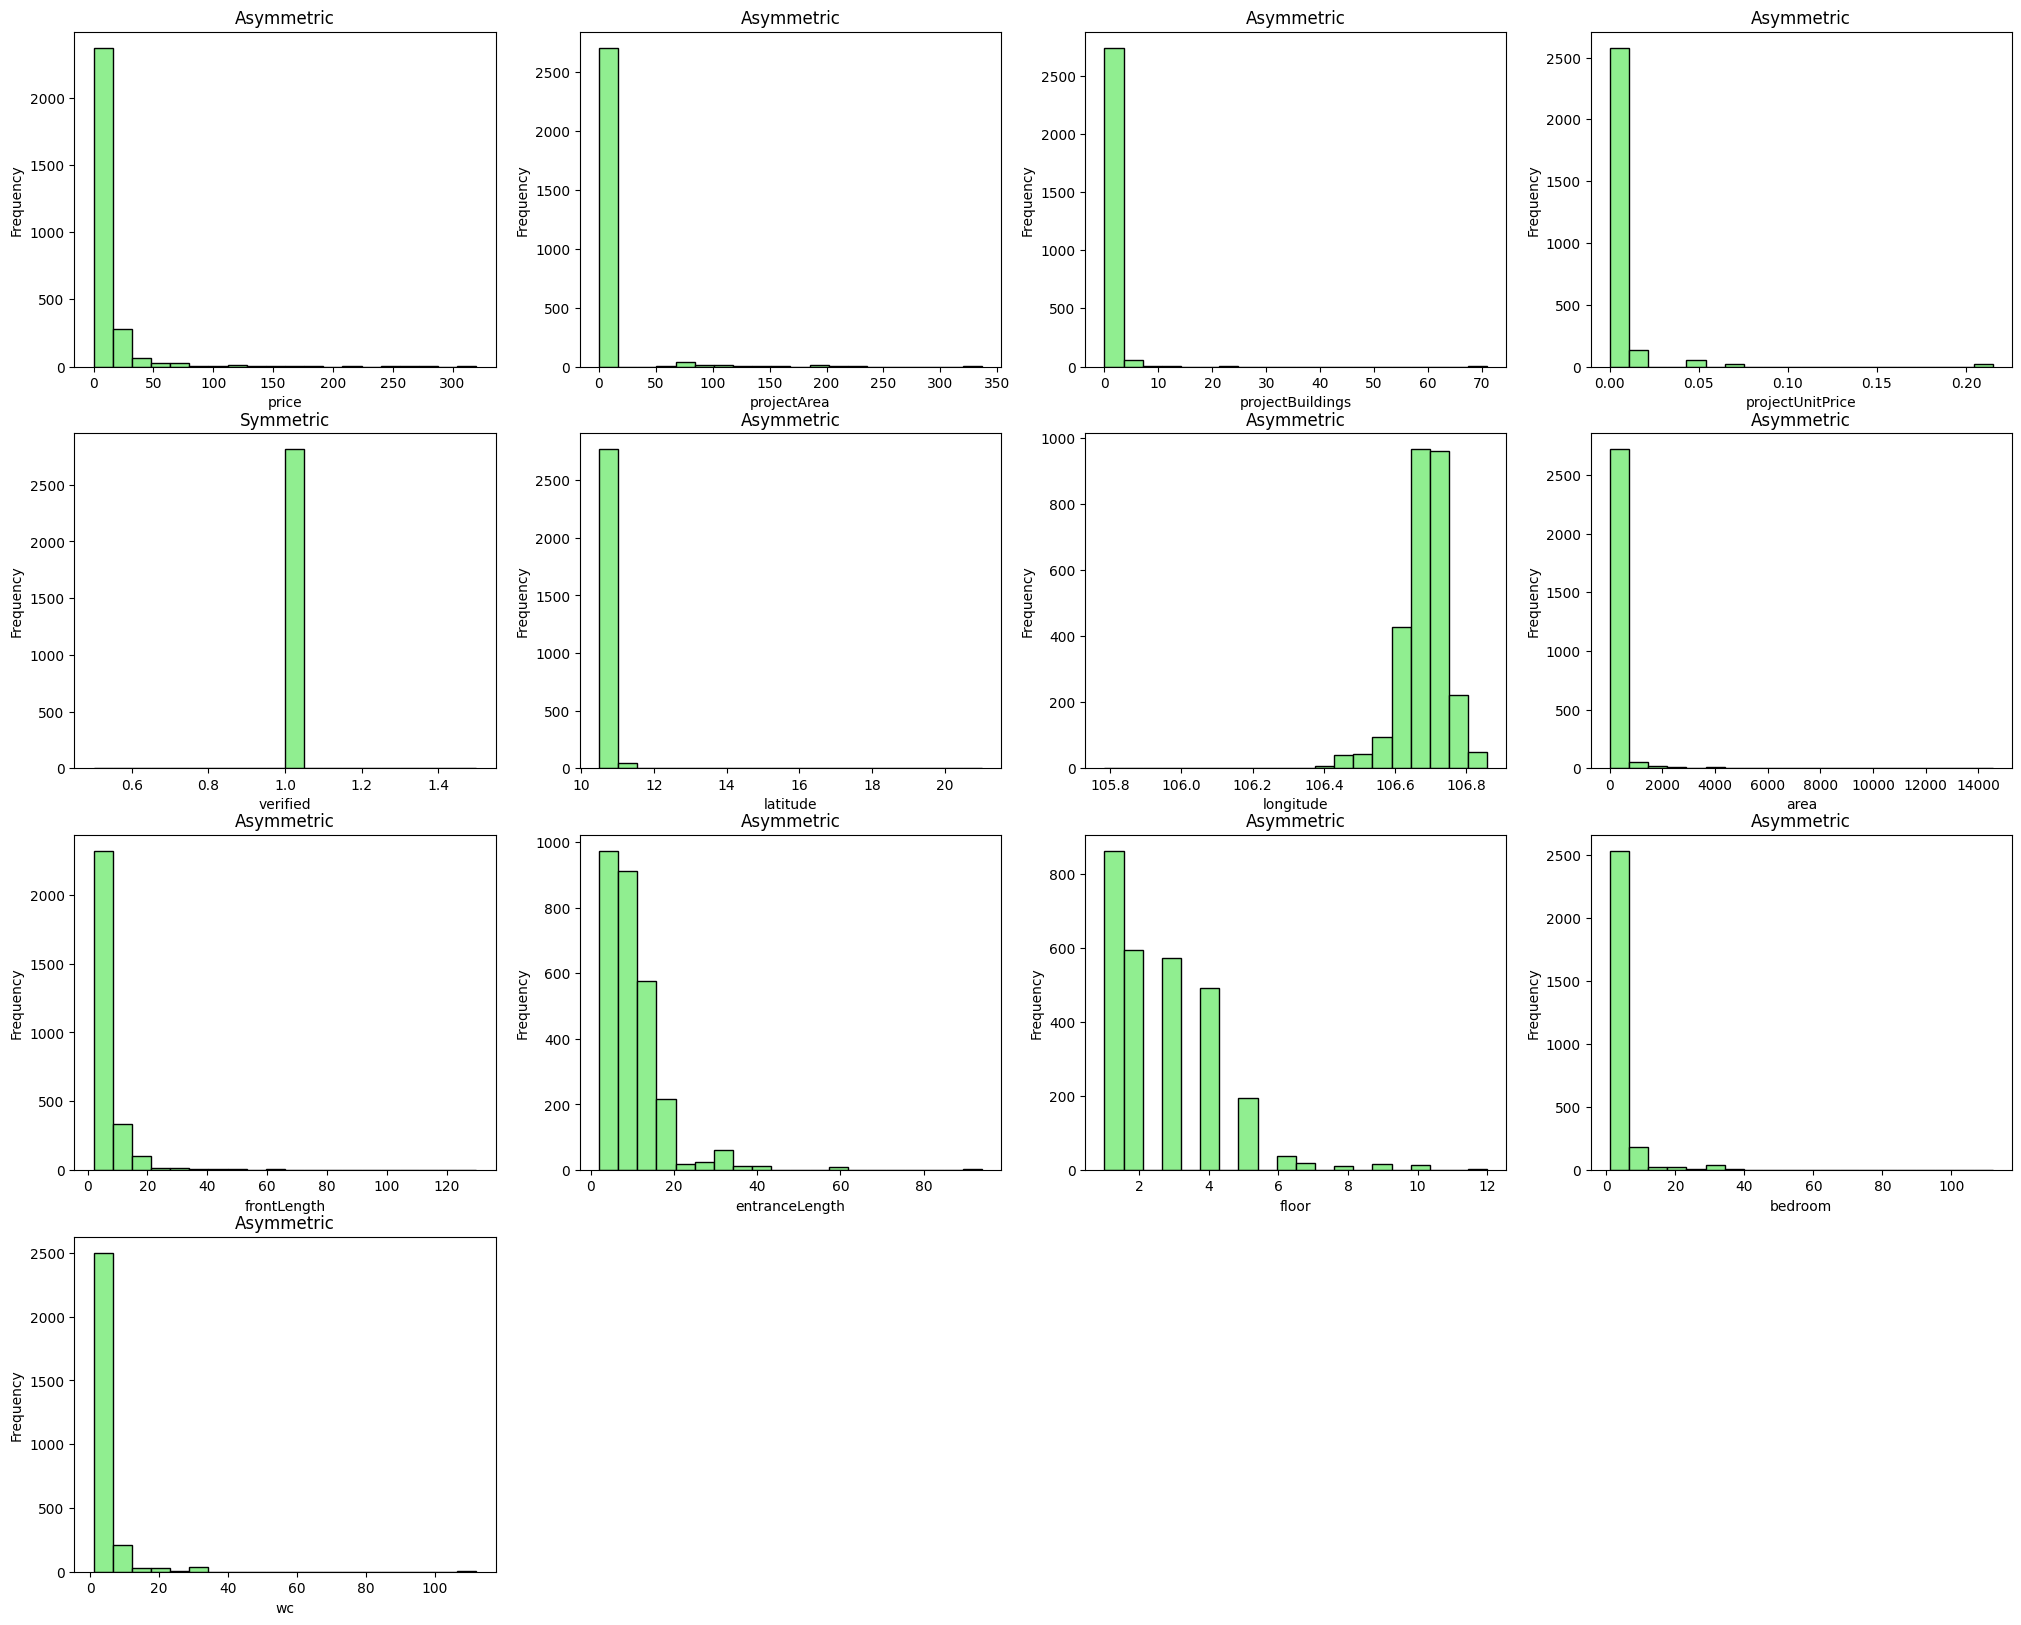

In [38]:
check_df_symmetry(verified_df, visualize=True)

Text(0.5, 0.98, 'Phân bố địa điểm - TP.HCM')

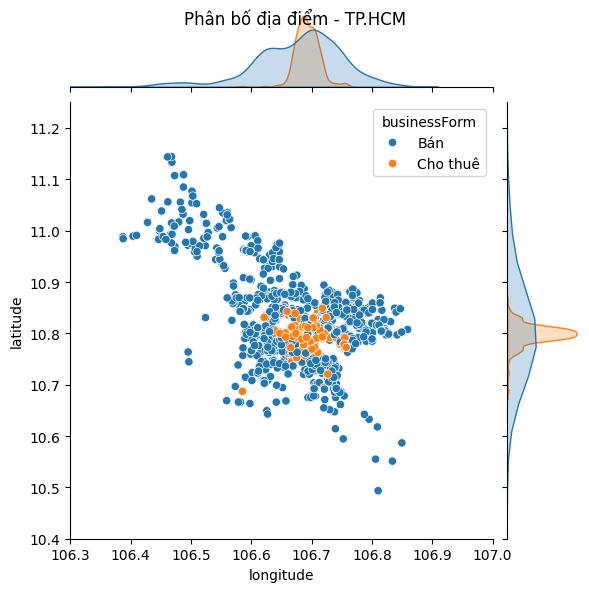

In [39]:
sns.jointplot(
    verified_df, x="longitude", y="latitude", 
    hue="businessForm", 
    kind="scatter",
    xlim=[106.3, 107],
    ylim=[10.4, 11.25], 
).figure.suptitle("Phân bố địa điểm - TP.HCM")

Text(0.5, 0.98, 'Giá bđs - Hình thức kinh doanh - thuộc dự án')

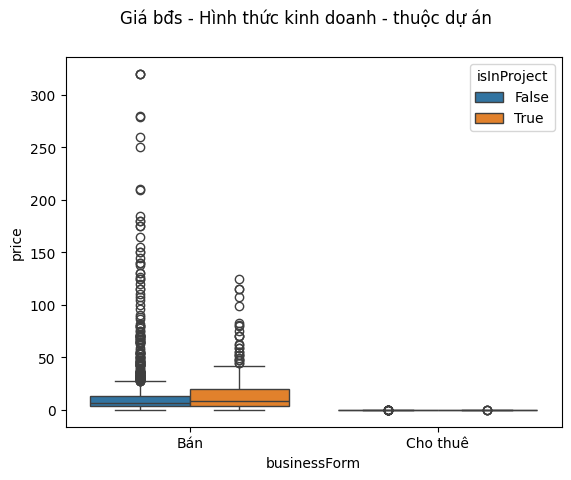

In [40]:
ax = sns.boxplot(verified_df, y="price", hue="isInProject", x="businessForm")
ax.figure.suptitle("Giá bđs - Hình thức kinh doanh - thuộc dự án")

Mối quan hệ giữa diện tích (trục hoành) và giá bđs (trục hoành)

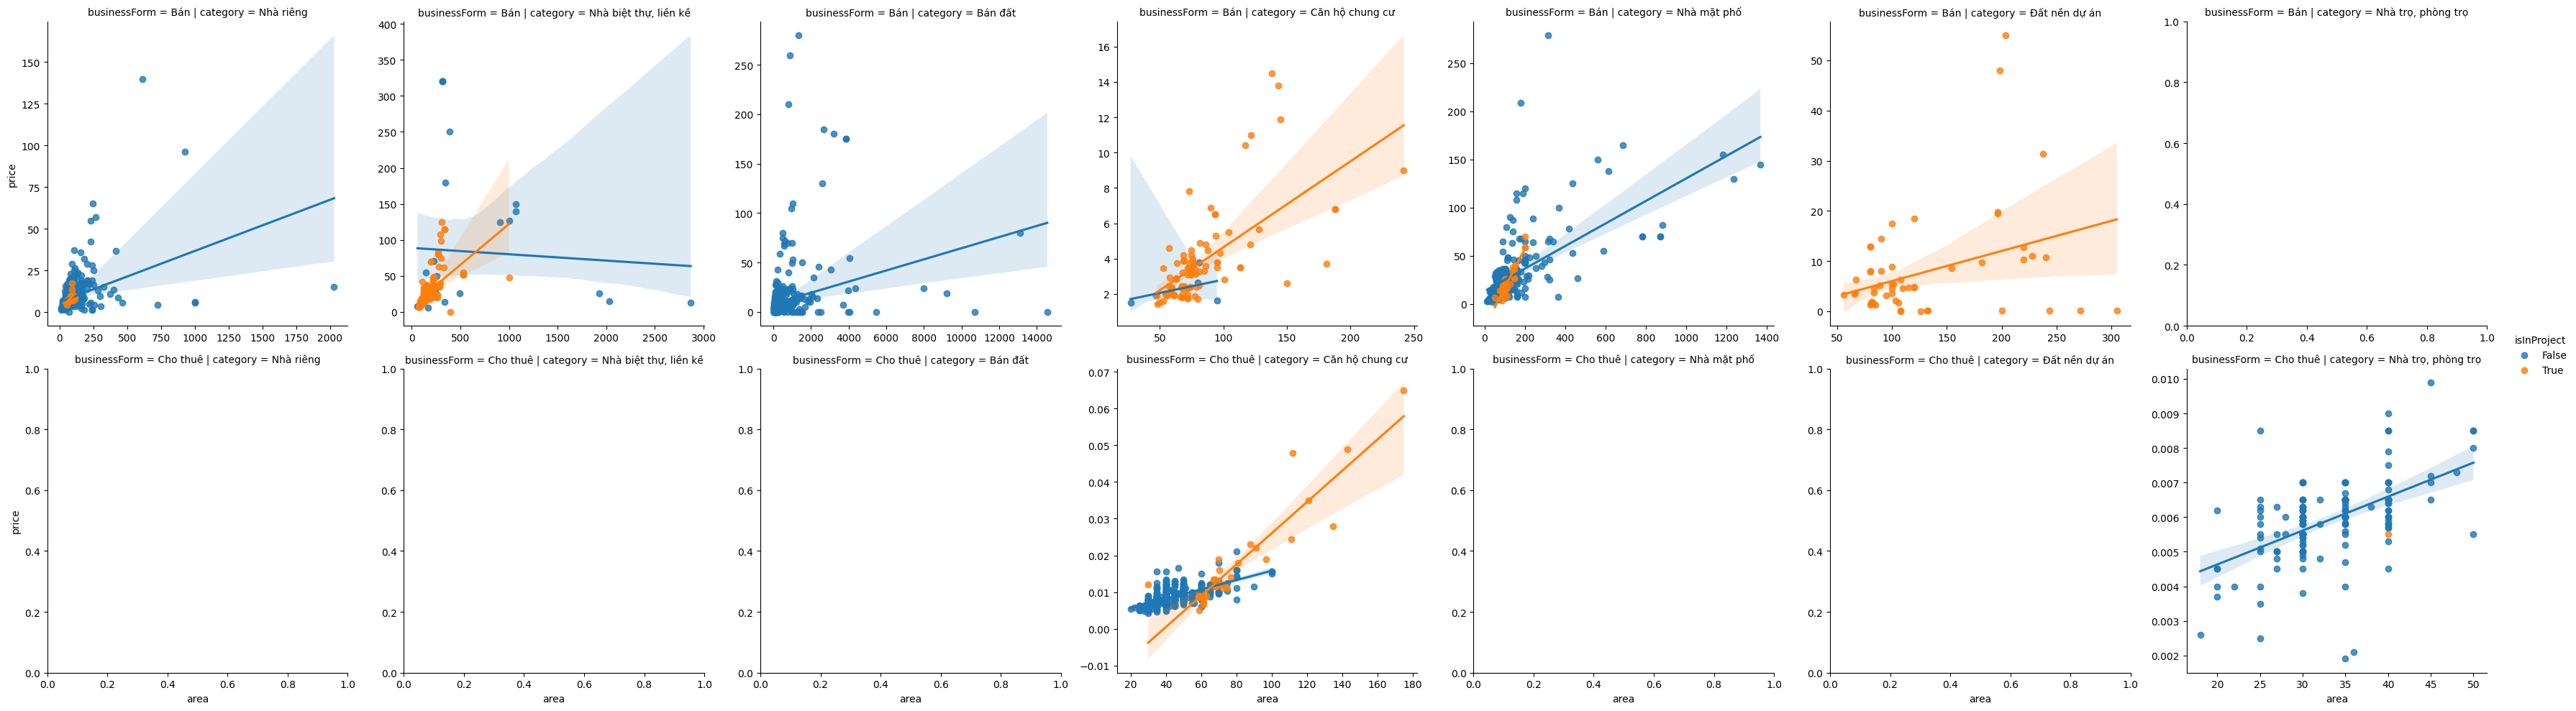

In [41]:
sns.lmplot(verified_df, x="area", y="price", row="businessForm", col="category", hue="isInProject", facet_kws={"sharex":False, "sharey":False})

Mối quan hệ giữa số phòng ngủ (trục hoành) và giá bđs (trục tung)

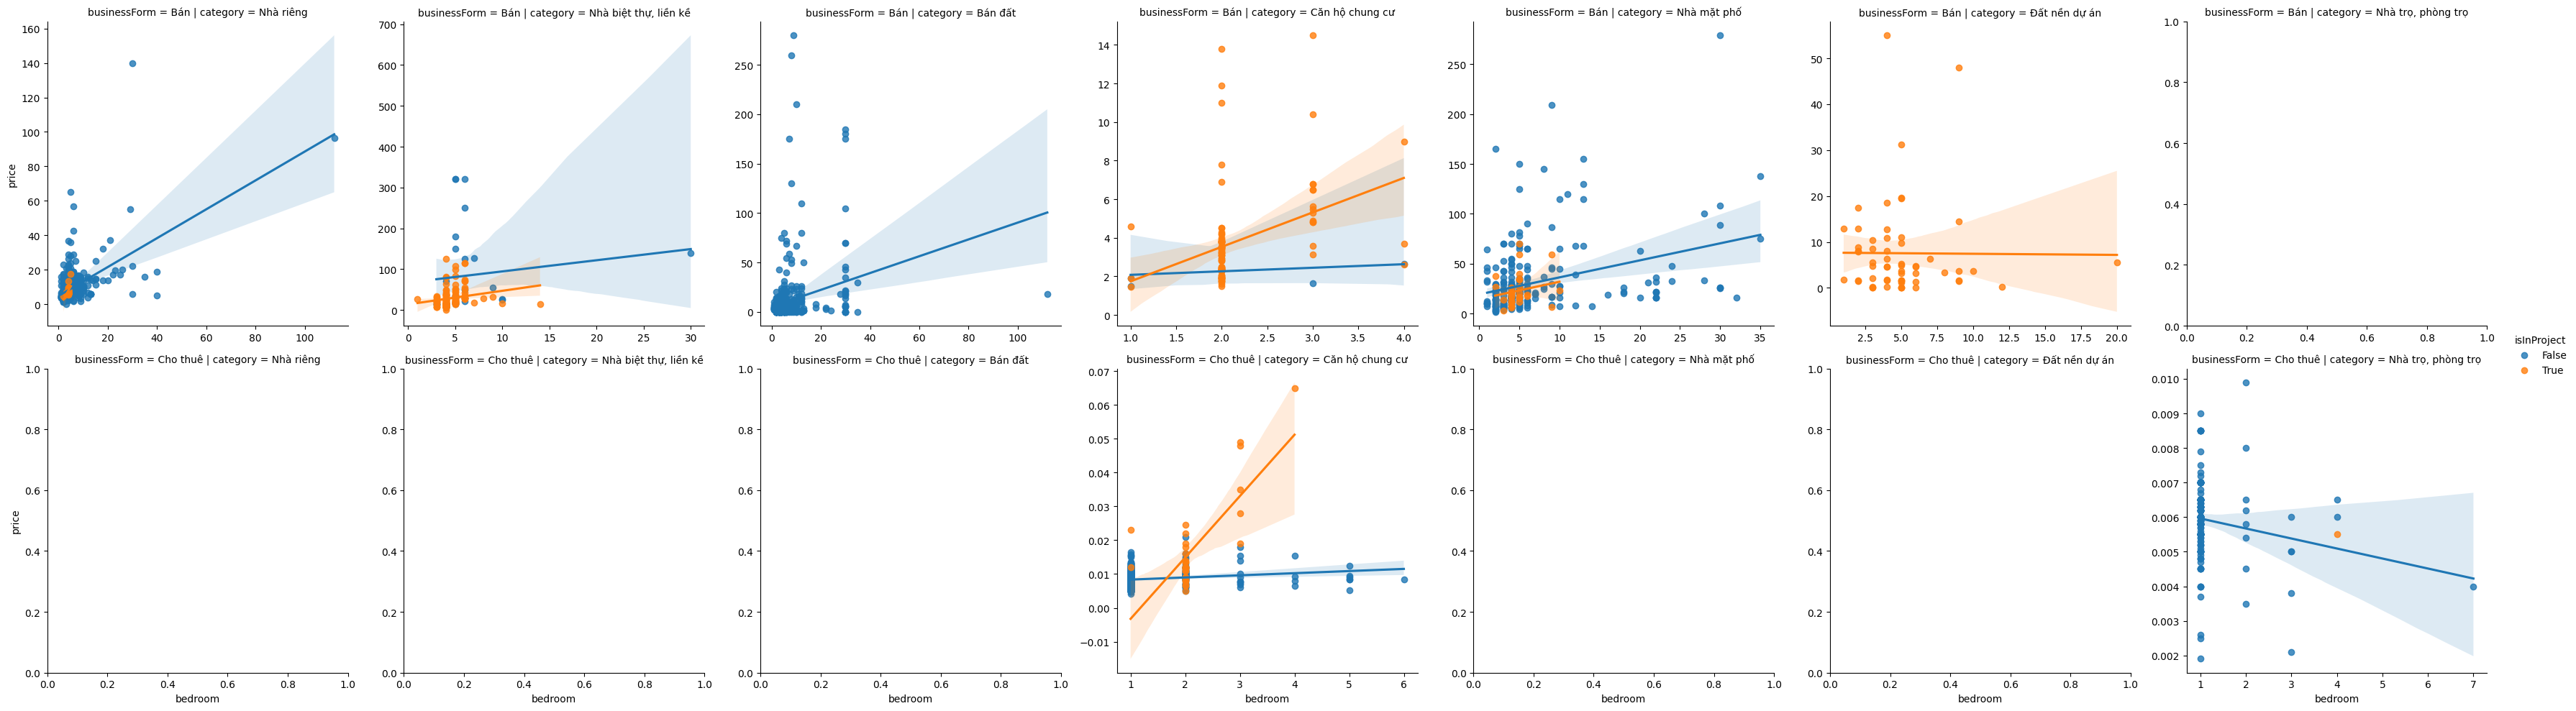

In [42]:
sns.lmplot(verified_df, x="bedroom", y="price", row="businessForm", col="category", hue="isInProject", facet_kws={"sharex":False, "sharey":False})

Mối quan hệ giữa số tầng (trục hoành) và giá bđs (trục tung)

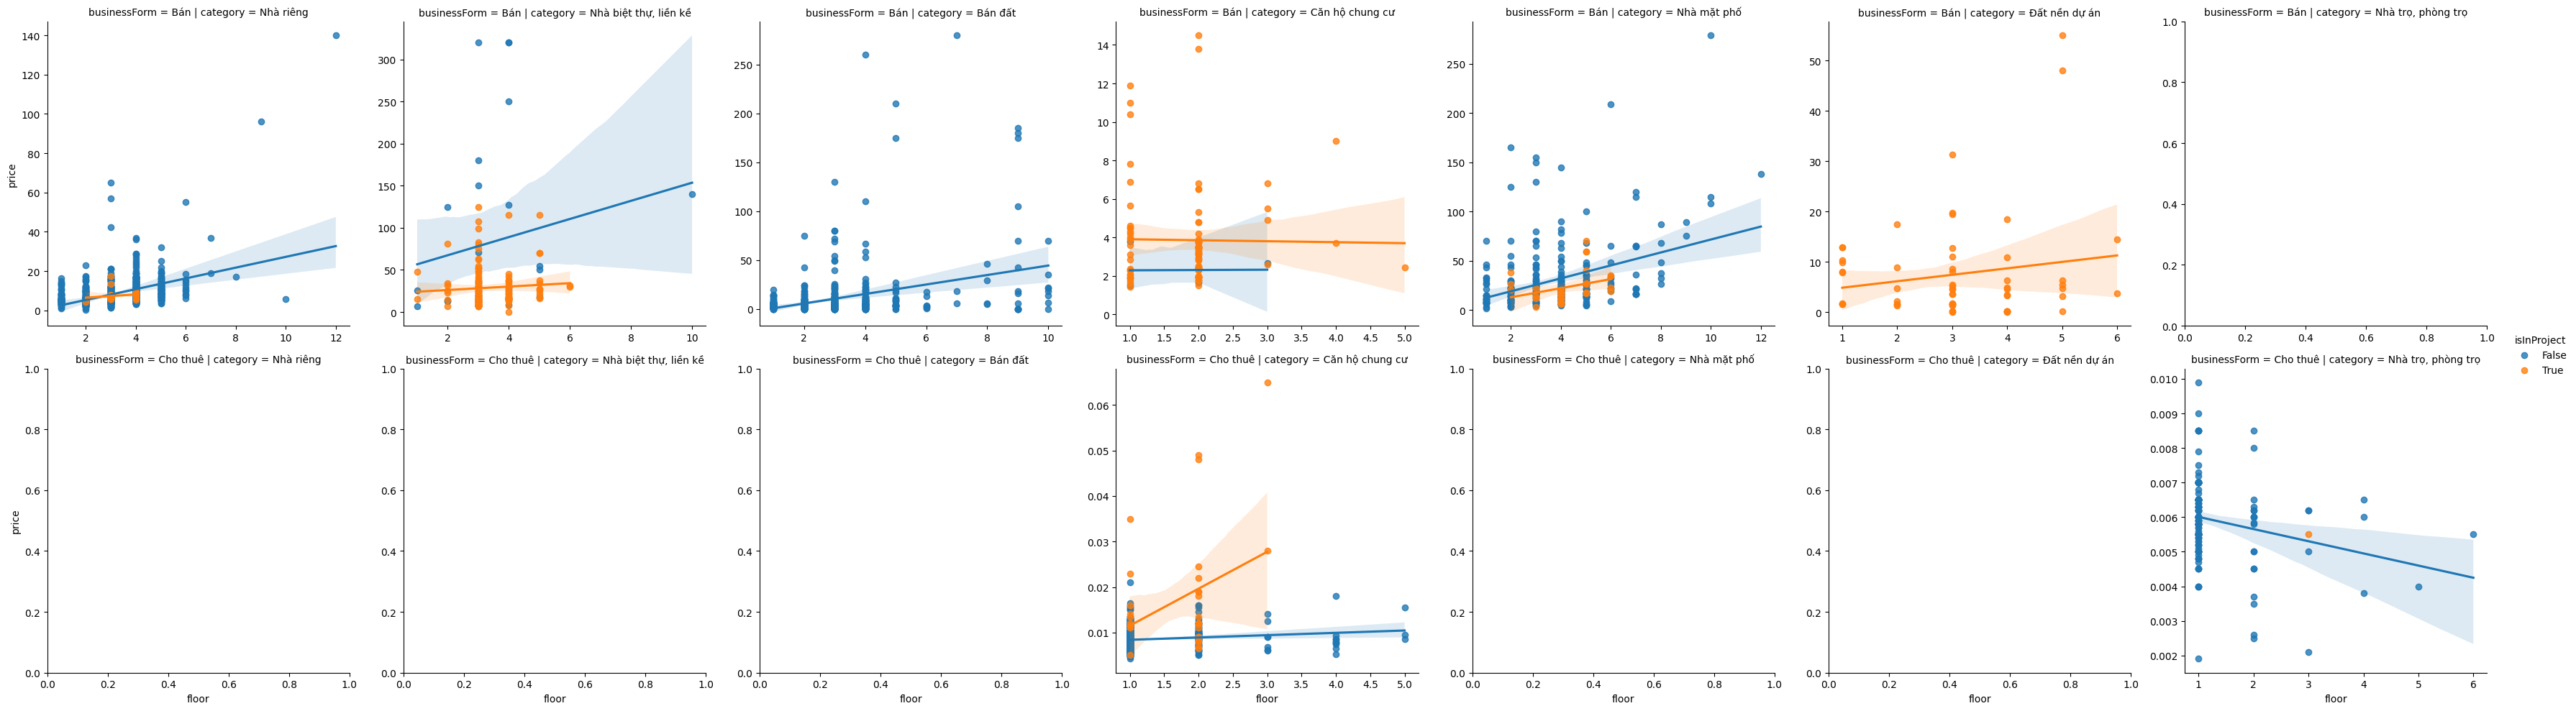

In [43]:
sns.lmplot(verified_df, x="floor", y="price", row="businessForm", col="category", hue="isInProject", facet_kws={"sharex":False, "sharey":False})

Mối quan hệ giữa chiều dài mặt tiền (trục hoành) và giá bđs (trục tung)

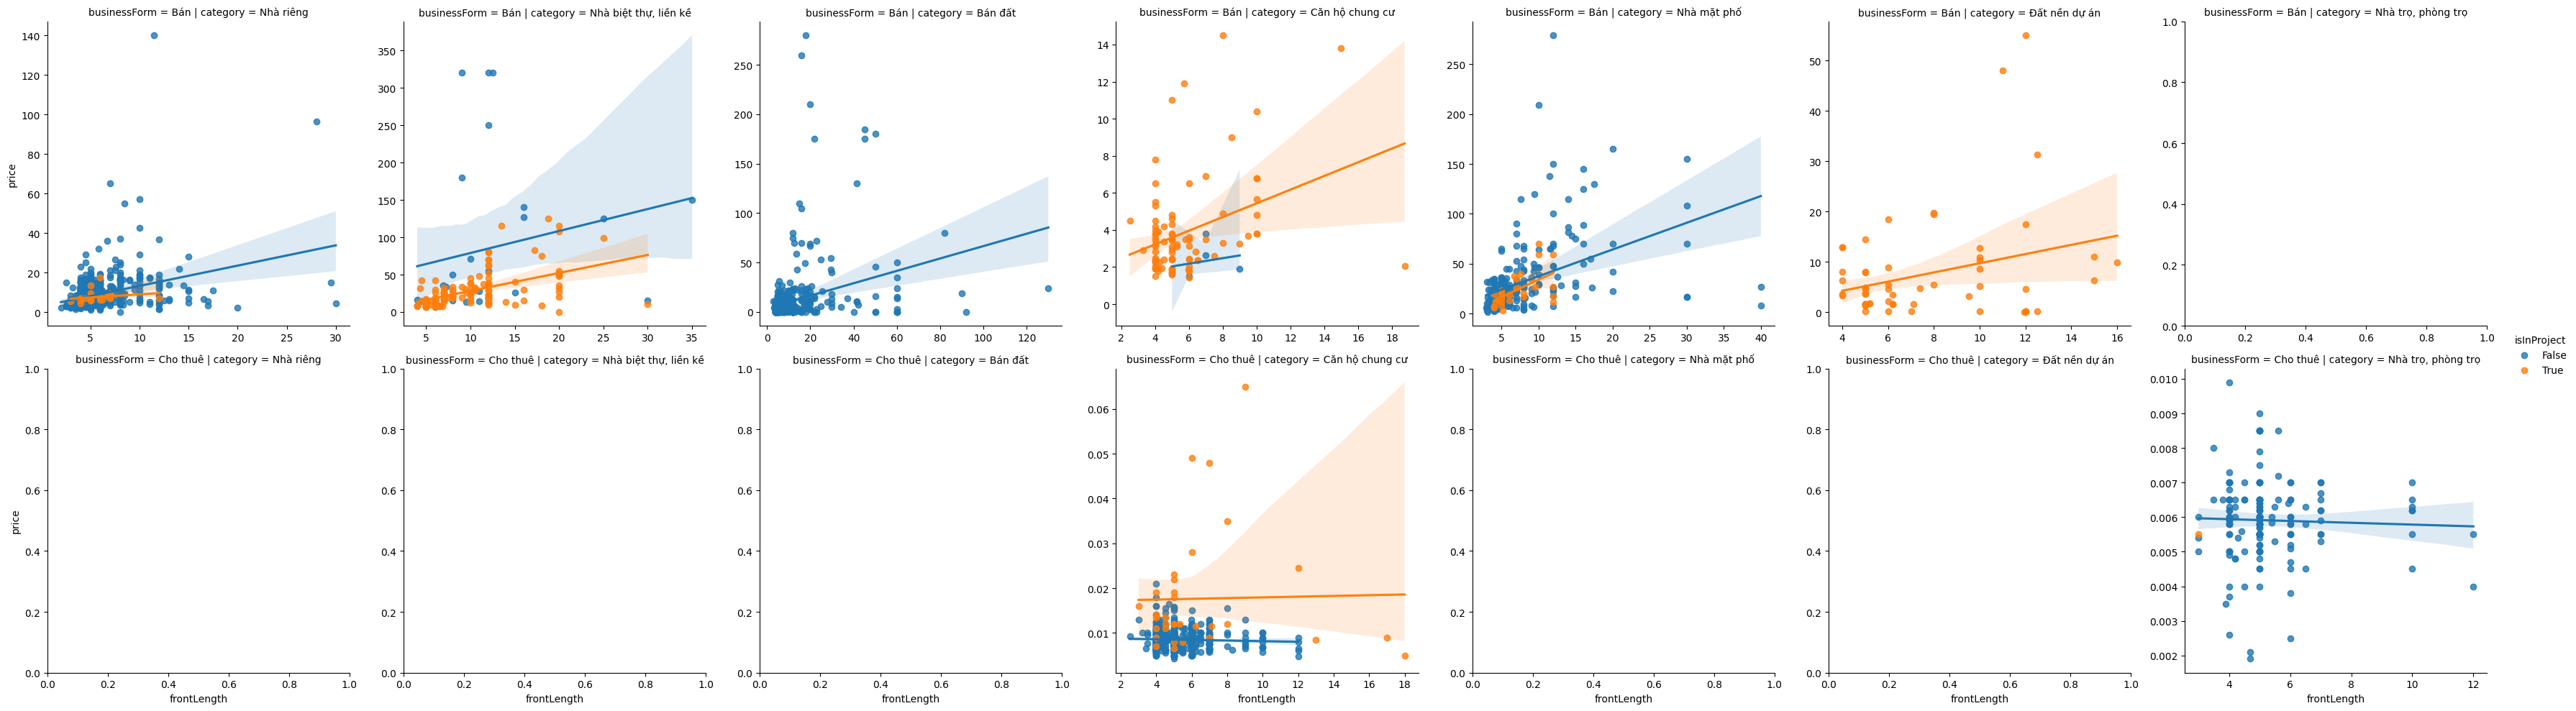

In [44]:
sns.lmplot(verified_df, x="frontLength", y="price", row="businessForm", col="category", hue="isInProject", facet_kws={"sharex":False, "sharey":False})

Mối quan hệ giữa chiều dài lối vào (trục hoành) và giá bđs (trục tung)

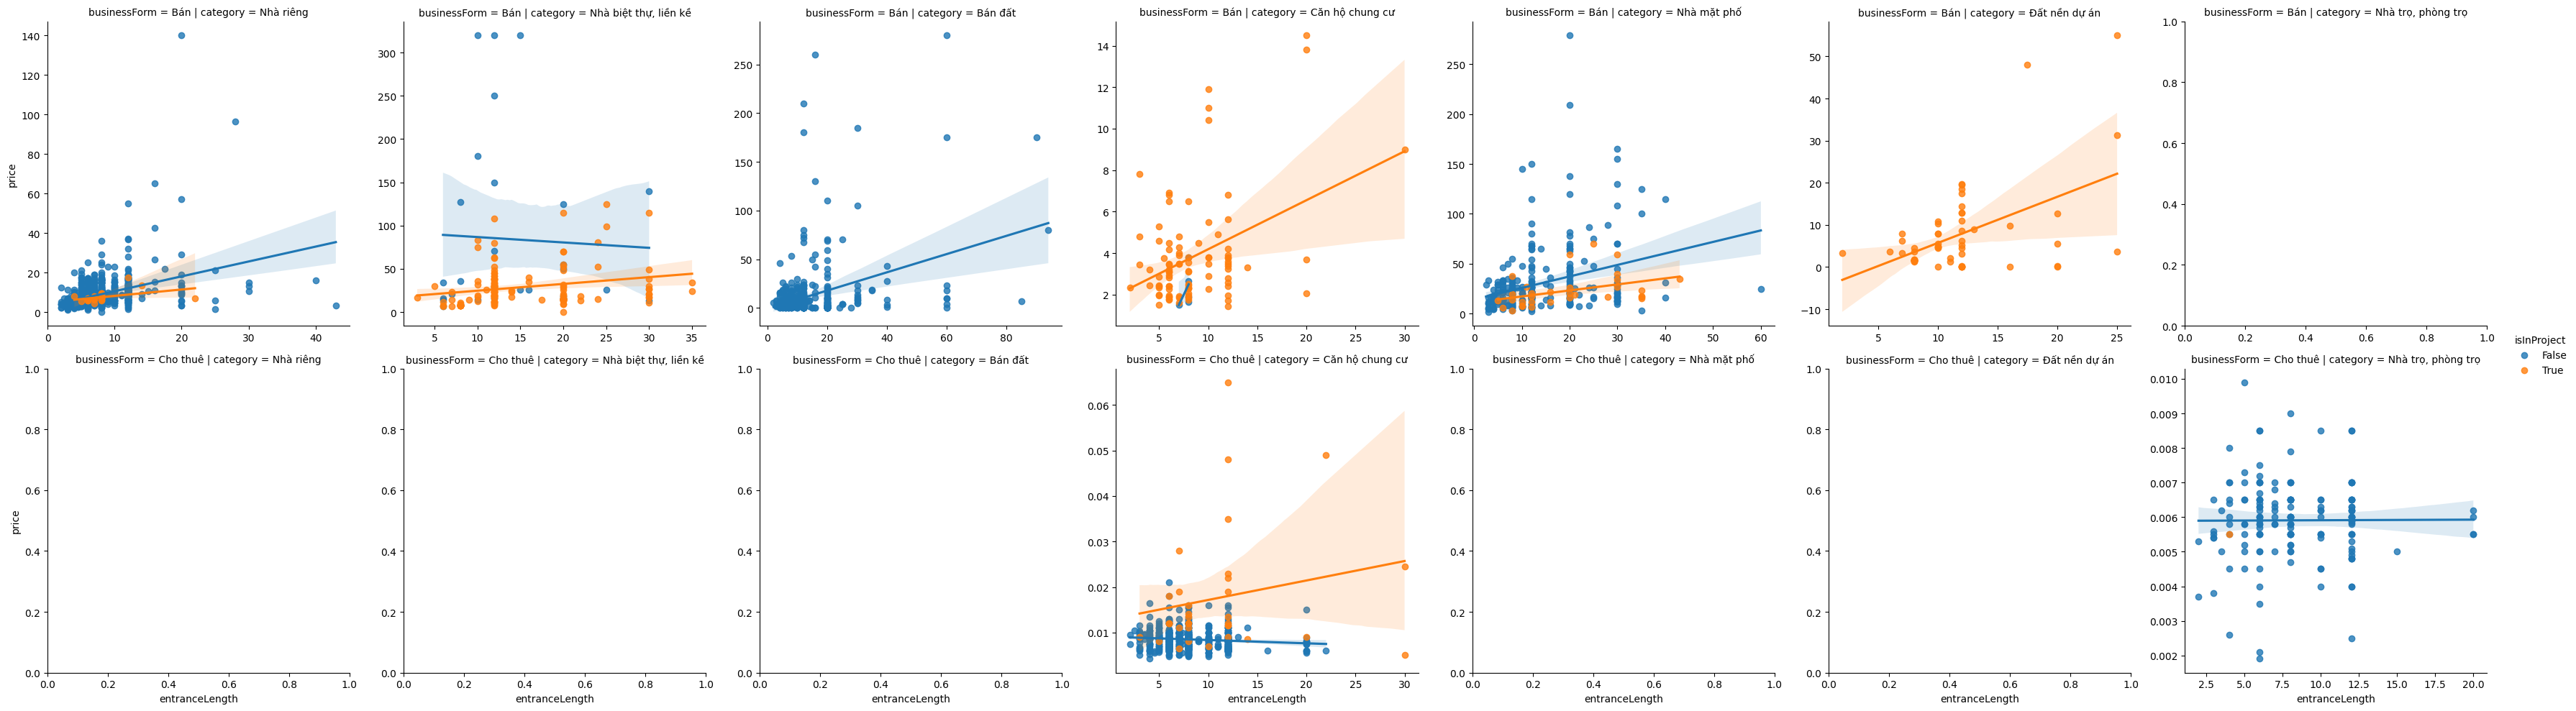

In [45]:
sns.lmplot(verified_df, x="entranceLength", y="price", row="businessForm", col="category", hue="isInProject", facet_kws={"sharex":False, "sharey":False})

Mức độ dao động của biến `price` tỉ lệ thuận với giá trị các biến độc lập, hay còn gọi là heteroskedasticity. Do đó, để phương sai của `price` tiến gần hơn về 1 hằng số, ta áp dụng phép biến hình log tự nhiên lên biến `price`.

In [46]:
preprocess_pl.add(
    "log_transform_price",
    lambda df: pd.concat([
        np.log(df.pop("price")),
        df
    ], axis=1)
)

### Feature Selection

Ta chia làm 2 bộ dữ liệu "Bán" và "Cho thuê" để tạo ra 2 mô hình

In [47]:
for_sale = df["businessForm"] == "Bán"
for_rent = ~for_sale

sale_df = preprocess_pl(df[for_sale & verified])
rent_df = preprocess_pl(df[for_rent & verified])

Tạo `FeatureSelector` cho 2 hình thức mua và bán

In [48]:
sale_selector = FeatureSelector(
    k_numerical=7,
    k_categorical=1
).fit(sale_df, y="price")

rent_selector = FeatureSelector(
    k_numerical=5,
    k_categorical=1
).fit(rent_df, y="price")

/home/dat/Desktop/venv/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/home/dat/Desktop/venv/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [49]:
print(f"Tên các feature 'Bán': {sale_selector.feature_names.to_list()}")
print(f"Tên các feature 'Cho thuê': {rent_selector.feature_names.to_list()}")

Tên các feature 'Bán': ['floor', 'wc', 'longitude', 'entranceLength', 'bedroom', 'projectUnitPrice', 'frontLength', 'category_Bán đất', 'category_Căn hộ chung cư', 'category_Nhà biệt thự, liền kề', 'category_Nhà mặt phố', 'category_Nhà riêng', 'category_Đất nền dự án']
Tên các feature 'Cho thuê': ['area', 'bedroom', 'wc', 'projectBuildings', 'projectUnitPrice', 'category_Căn hộ chung cư', 'category_Nhà trọ, phòng trọ']


In [50]:
Xsale, ysale = sale_selector.select(sale_df)
Xrent, yrent = rent_selector.select(rent_df)

Tách thành các tập dữ liệu train, test

In [51]:
Xsale_train, Xsale_test, ysale_train, ysale_test = train_test_split(Xsale, ysale, test_size=0.3)
Xrent_train, Xrent_test, yrent_train, yrent_test = train_test_split(Xrent, yrent, test_size=0.3)

### Modeling

Hiện ta có các mô hình tiềm năng (candidates) dùng để dự đoán giá trị:
1. Elastic Net
2. Decision Tree Regressor
3. Random Forest Regressor
4. SVR

In [52]:
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

regressors = {
    "elastic": ElasticNet,
    "tree": DecisionTreeRegressor,
    "forest": RandomForestRegressor,
    "svr": SVR
}

sale_candidates = {
    name: reg()
    for name, reg in regressors.items()
}
rent_candidates = {
    name: reg()
    for name, reg in regressors.items()
}

Huấn luyện các mô hình tiềm năng

In [53]:
sale_evaluator = SkLearnModelEvaluator(sale_candidates) \
            .fit((Xsale_train, ysale_train))
rent_evaluator = SkLearnModelEvaluator(rent_candidates) \
            .fit((Xrent_train, yrent_train))

Tiến hành đánh giá model với tập dữ liệu train

In [54]:
sale_evaluator.evaluate(
    (Xsale_train, ysale_train),
    metrics=("r2_score", "mae")
)

,r2_score,mae
model_name,,
elastic,0.046043,0.85609
tree,0.99701,0.003412
forest,0.911709,0.210568
svr,0.059681,0.763978


In [55]:
rent_evaluator.evaluate(
    (Xrent_train, yrent_train),
    metrics=("r2_score", "mae")
)

,r2_score,mae
model_name,,
elastic,0.603027,0.157786
tree,0.747895,0.118082
forest,0.742723,0.122623
svr,0.667802,0.141741


Tiến hành đánh giá model với tập dữ liệu test

In [56]:
sale_evaluator.evaluate(
    (Xsale_test, ysale_test),
    metrics=("r2_score", "mae")
)

,r2_score,mae
model_name,,
elastic,0.047802,0.833604
tree,0.127065,0.681195
forest,0.455733,0.530397
svr,0.037112,0.75866


In [57]:
rent_evaluator.evaluate(
    (Xrent_test, yrent_test),
    metrics=("r2_score", "mae")
)

,r2_score,mae
model_name,,
elastic,0.506338,0.15835
tree,0.546866,0.149933
forest,0.59865,0.143101
svr,0.571627,0.145121


Như kết quả phía trên, ta kết luận rằng Random Forest Regressor dự đoán kết quả tốt nhất.

In [58]:
sale_model = sale_evaluator.best_model(show_evals=False)
rent_model = rent_evaluator.best_model(show_evals=False)
sale_model, rent_model

(RandomForestRegressor(), RandomForestRegressor())

### Explaining

Sử dụng thư viện explainable AI - SHAP và tính toán các SHAP values

In [59]:
import shap

sale_explainer = shap.Explainer(sale_model.predict, Xsale_test.sample(10))
rent_explainer = shap.Explainer(rent_model.predict, Xrent_test.sample(10))

sale_sv = sale_explainer(Xsale_test)
rent_sv = rent_explainer(Xrent_test)

PermutationExplainer explainer: 612it [00:43, 11.13it/s]                         


#### Giải thích mô hình "Bán"

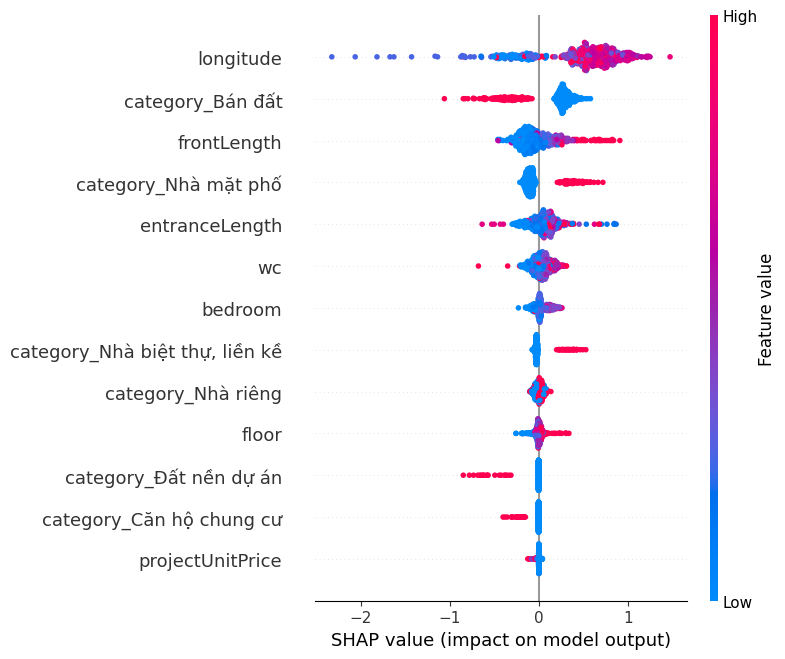

In [60]:
shap.summary_plot(sale_sv)

Dựa vào đồ thị trên, ta có thể rút ra một số kết luận về mô hình "Bán":
- Các bđs nằm ở phía bên trái TP.HCM sẽ có giá thấp hơn các bđs thuộc trung tâm trở đi.
- Đất trống và đất nền dự án có giá thấp hơn các loại bđs khác.
- Bđs đã được xây sẵn (Nhà mặt phố; Nhà biệt thự, liền kề) có giá cao hơn.
- Chiều dài mặt tiền càng lớn thì giá bđs càng cao.
- Chiều dài lối vào bđs tỉ lệ thuận với giá cả.
- Số phòng ngủ, WC tỉ lệ thuận với giá cả, nhưng không quá rõ rệt.
- Bđs càng có nhiều lầu thì giá càng cao.

#### Giải thích mô hình "Cho thuê"

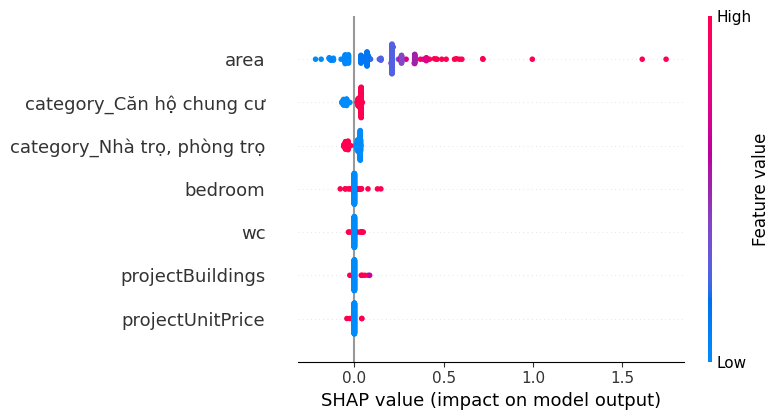

In [61]:
shap.summary_plot(rent_sv)

Một số kết luận có thể được rút ra từ sơ đồ trên:
- Diện tích của bđs tỉ lệ thuận một cách rõ rệt và mạnh mẽ đến giá cả.
- Giá căn hộ chung cư mắc hơn giá nhà trọ, phòng trọ.
- Số phòng ngủ và WC không mấy ảnh hưởng đến giá.

### Mở rộng vấn đề: Kiểm định giá BĐS

Giả sử rằng ở một viễn cảnh trong mơ, ta có được một mô hình tốt đủ để dự đoán giá bđs với sai số thấp. Dựa vào sự hỗ trợ của mô hình dự đoán, ta có thể kết luận rằng một bài đăng tin ra giá sai nếu giá bán:
1. Quá thấp so với dự đoán.
2. Quá cao so với dự đoán.

Vậy, vấn đề trở thành: **Xác định được khoảng sai số có thể chấp nhận của mô hình mà phần lớn trong thực tế sẽ gặp phải.**

Dựa vào mô hình tốt nhất ta tìm được như trên, ta tiến hành xem xét phân phối của sai số dựa vào tập dữ liệu test của mô hình:

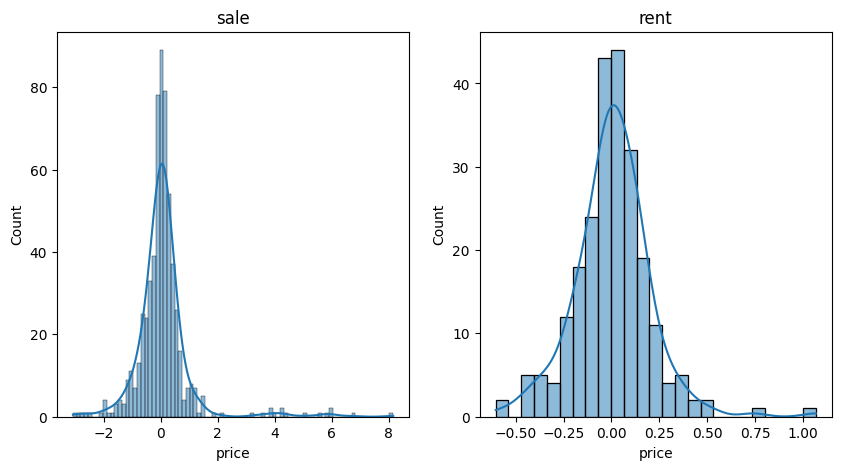

In [62]:
preds = rent_model.predict(Xrent_test)
diffs = {
    "sale": sale_model.predict(Xsale_test) - ysale_test,
    "rent": rent_model.predict(Xrent_test) - yrent_test
}

plt.figure(figsize=(10, 5))
for i, (form, diff) in enumerate(diffs.items()):
    plt.subplot(1, 2, i+1)
    plt.title(form)
    sns.histplot(diff, kde=True)

Từ đồ thị trên, ta thấy được phân phối của sai số có dạng chuông. Ta có thể khẳng định rằng, phân phối của sai số là:
- Student's T (nếu $N \leq 30$)
- Normal (nếu $N > 30$)

Ta giả sử phần lớn ($99\%$) giá của các bài đăng gần với dự đoán sẽ là những bài đăng ra giá thích hợp.

Số ít bài đăng còn lại ($1\%$) sẽ là những bài đăng ra giá ảo.

$\Rightarrow$ Ta có độ tin cậy $c = 99\% \Rightarrow \alpha = 1\%$ 

Gọi độ chính xác: 
$$
m = z \cdot \sigma
$$

Trong đó:
- $z$: z-score của phân phối dựa vào độ tin cậy/mức ý nghĩa.
- $\sigma$: Độ lệch chuẩn của sai số.

Khi đó, khoảng giá chấp nhận được của tin đăng là $[\varepsilon_1, \varepsilon_2]$ với:
- $\varepsilon_1 = \bar\varepsilon - m$
- $\varepsilon_2 = \bar\varepsilon + m$

Trong đó:
- $\bar\varepsilon$: Kì vọng của sai số.
- $\varepsilon_1$: Ngưỡng sai số dưới
- $\varepsilon_2$: Ngưỡng sai số trên

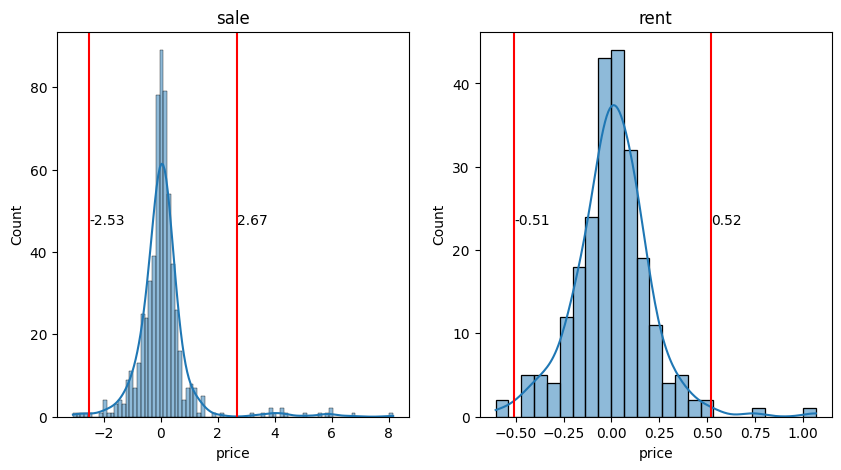

In [63]:
plt.figure(figsize=(10, 5))
for i, (form, diff) in enumerate(diffs.items()):
    plt.subplot(1, 2, i+1)
    plt.title(form)
    c = .99
    alpha = 1 - c
    N = diff.shape[0]
    mean = diff.mean()
    std = diff.std()
    zscore = stats.norm.ppf(c + alpha/2)

    m = zscore * std
    lower_bound, upper_bound = mean - m, mean + m

    sns.histplot(diff, kde=True)

    mean_ylim = np.mean(plt.ylim())
    plt.axvline(lower_bound, color="r")
    plt.text(lower_bound, mean_ylim, f"{lower_bound:.2f}")
    plt.axvline(upper_bound, color="r")
    plt.text(upper_bound, mean_ylim, f"{upper_bound:.2f}")

### Model deployment

Sử dụng bộ dữ liệu chưa được xác thực

In [64]:
unverified_df = preprocess_pl(df[~verified])

unverified_sale = unverified_df["businessForm"] == "Bán"
unverified_rent = unverified_df["businessForm"] == "Cho thuê"

Chia bộ dữ liệu thành 2 tập "Bán" và "Cho thuê"

In [65]:
saleerror_X, saleerror_y = sale_selector.select(unverified_df[unverified_sale])
renterror_X, renterror_y = rent_selector.select(unverified_df[unverified_rent])

Tạo model để kiểm định bđs "Bán"

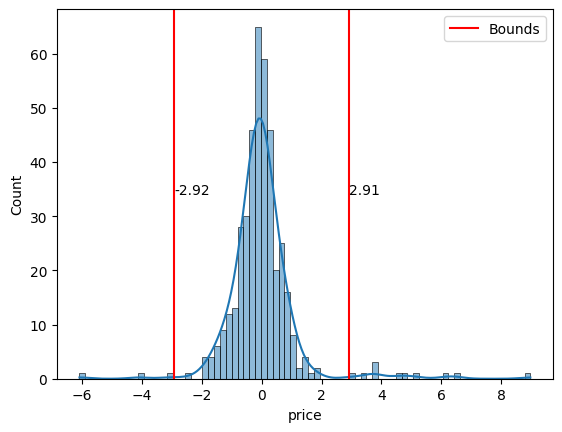

In [66]:
sale_tester = ErrorTester(sale_model).fit((saleerror_X, saleerror_y), c=.99)
sale_tester.plot_fitted()

Tạo model để kiểm định bđs "Cho thuê"

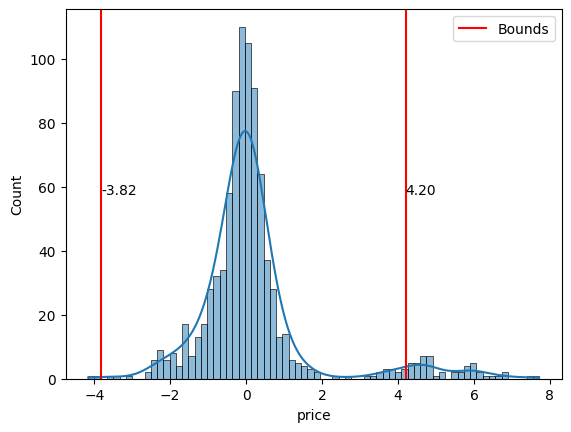

In [67]:
rent_tester = ErrorTester(rent_model).fit((renterror_X, renterror_y), c=.99)
rent_tester.plot_fitted()

Lưu lại các model

In [68]:
# import joblib

# joblib.dump(sale_tester, "sale-tester.pkl")
# joblib.dump(rent_tester, "rent-tester.pkl")